In [157]:
import requests
import bs4 as bs
import pandas as pd
import geopandas as gp
import numpy as np
import pylab as plt

import seaborn as sns
%matplotlib inline

sns.set_style("white")
sns.set(font_scale=1.4)

In [148]:
#Get names
europe_names = ["Austria","Italy","Belgium","Latvia","Bulgaria","Lithuania","Croatia","Luxembourg","Cyprus","Malta","Czech Rep." ,"Netherlands","Denmark","Poland","Estonia","Portugal","Finland","Romania","France","Slovakia","Germany","Slovenia","Greece","Spain","Hungary","Sweden","Ireland","Norway","Switzerland","Turkey","Serbia","Montenegro","Bosnia and Herz.","Albania","Macedonia","Kosovo","Modova","Russia","Ukraine","Belarus"]
europe = [_.replace(" ","_").replace("Netherlands","the_Netherlands") for _ in europe_names]

lens = []
for c in europe:
    r = requests.get("https://en.wikipedia.org/wiki/Corruption_in_{}".format(c))
    html = bs.BeautifulSoup(r.text)
    lens.append(len("".join([_.text for _ in html.find_all("p")]).replace(" ","")))

d_name2corr = dict(zip(europe_names,lens))

/home/shared/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


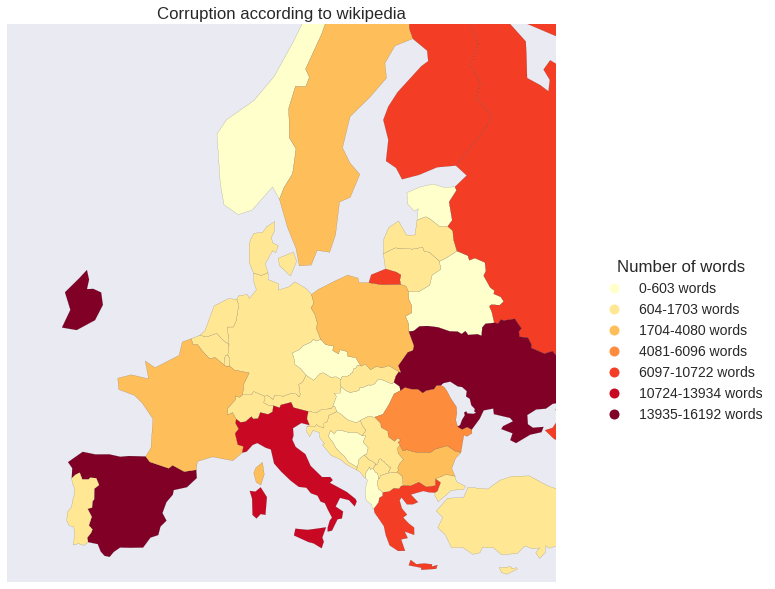

In [158]:
#Delete projection
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world = world[world.name.isin(europe_names)]
world["corruption"] = world["name"].map(d_name2corr)
world["corruption"] = world["corruption"].astype(int)
#Mercator projection
world = world.to_crs({'init': 'epsg:3395'}) 

#Plot
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
ax.set_aspect("equal") #this one is important

world.plot(linewidth=0.1,cmap="YlOrRd",column="corruption",ax=ax, scheme='fisher_jenks', k=7,legend=True)
plt.xlim(-1700000,4200000)
plt.ylim(0.4E7,1E7)
plt.title("Corruption according to wikipedia")
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2, 0.4, 0.2, 0.2))
leg.set_title("Number of words")

leg.get_texts()[0].set_text('0-603 words')
leg.get_texts()[1].set_text('604-1703 words')
leg.get_texts()[2].set_text('1704-4080 words')
leg.get_texts()[3].set_text('4081-6096 words')
leg.get_texts()[4].set_text('6097-10722 words')
leg.get_texts()[5].set_text('10724-13934 words')
leg.get_texts()[6].set_text('13935-16192 words')

ax.set_yticks([])
ax.set_xticks([])
sns.despine(left=True,bottom=True,trim=True)